In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV,cross_val_score

In [2]:
df = pd.read_csv(r"D:\All Data-set\diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [5]:
df.corr(numeric_only=True)

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [6]:
df.shape

(100000, 9)

In [7]:
for i in df.columns:
    unique_value = df[i].unique()
    print(f"{i} :: {unique_value}")

gender :: ['Female' 'Male' 'Other']
age :: [80.   54.   28.   36.   76.   20.   44.   79.   42.   32.   53.   78.
 67.   15.   37.   40.    5.   69.   72.    4.   30.   45.   43.   50.
 41.   26.   34.   73.   77.   66.   29.   60.   38.    3.   57.   74.
 19.   46.   21.   59.   27.   13.   56.    2.    7.   11.    6.   55.
  9.   62.   47.   12.   68.   75.   22.   58.   18.   24.   17.   25.
  0.08 33.   16.   61.   31.    8.   49.   39.   65.   14.   70.    0.56
 48.   51.   71.    0.88 64.   63.   52.    0.16 10.   35.   23.    0.64
  1.16  1.64  0.72  1.88  1.32  0.8   1.24  1.    1.8   0.48  1.56  1.08
  0.24  1.4   0.4   0.32  1.72  1.48]
hypertension :: [0 1]
heart_disease :: [1 0]
smoking_history :: ['never' 'No Info' 'current' 'former' 'ever' 'not current']
bmi :: [25.19 27.32 23.45 ... 59.42 44.39 60.52]
HbA1c_level :: [6.6 5.7 5.  4.8 6.5 6.1 6.  5.8 3.5 6.2 4.  4.5 9.  7.  8.8 8.2 7.5 6.8]
blood_glucose_level :: [140  80 158 155  85 200 145 100 130 160 126 159  90 260 220

In [8]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [9]:
# to find the percentages
(df['smoking_history'].value_counts()/len(df))*100

smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: count, dtype: float64

In [10]:
df['smoking_history'] = df['smoking_history'].replace('No Info',pd.NA)
mode_value = df['smoking_history'].mode()[0]
df['smoking_history'] = df['smoking_history'].fillna(mode_value)
print(df['smoking_history'].value_counts())

smoking_history
never          70911
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [12]:
df.gender.value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [13]:
df['bmi']

0        25.19
1        27.32
2        27.32
3        23.45
4        20.14
         ...  
99995    27.32
99996    17.37
99997    27.83
99998    35.42
99999    22.43
Name: bmi, Length: 100000, dtype: float64

In [14]:
df['bmi'] =[float(str(i).replace(',','')) for i in df['bmi']]

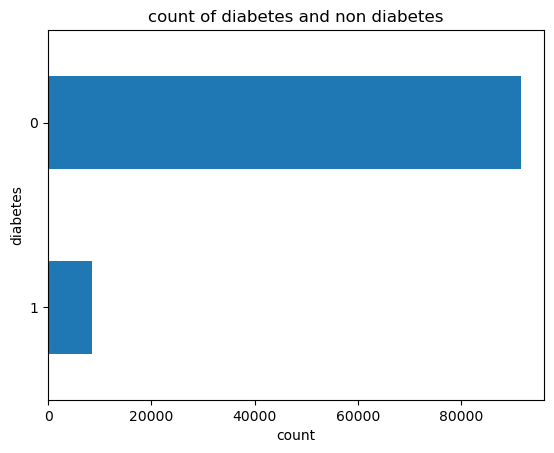

In [15]:
df['diabetes'].value_counts().plot(kind='barh')
plt.xlabel('count')
plt.ylabel('diabetes')
plt.title('count of diabetes and non diabetes')
plt.gca().invert_yaxis()
plt.show()

In [16]:
(df['diabetes'].value_counts()/len(df))*100

diabetes
0    91.5
1     8.5
Name: count, dtype: float64

In [17]:
le = LabelEncoder()

In [18]:
le

LabelEncoder()

In [19]:
label_encoder = ['gender','smoking_history']
df[label_encoder] = df[label_encoder].apply(le.fit_transform)

In [20]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,3,25.19,6.6,140,0
1,0,54.0,0,0,3,27.32,6.6,80,0
2,1,28.0,0,0,3,27.32,5.7,158,0
3,0,36.0,0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,0,20.14,4.8,155,0


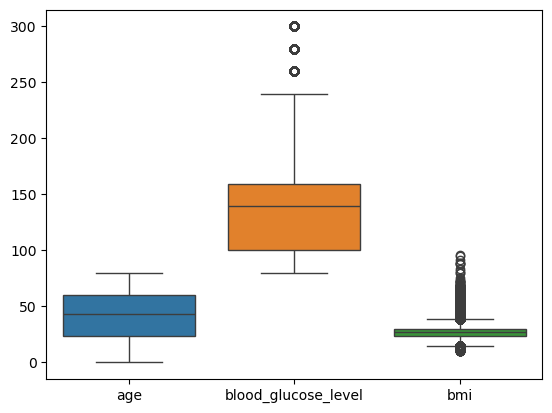

In [21]:
# check outlier
sns.boxplot(data=df[['age','blood_glucose_level','bmi']]);

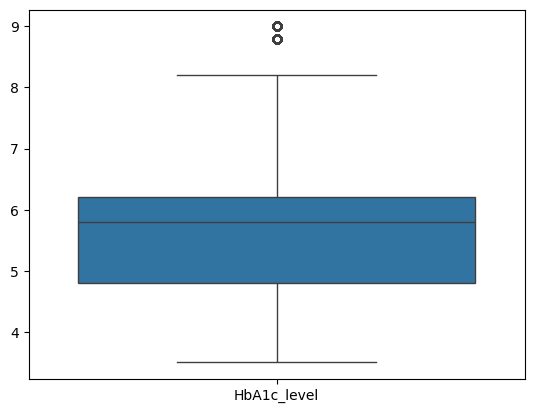

In [22]:
sns.boxplot(data=df[['HbA1c_level']]);

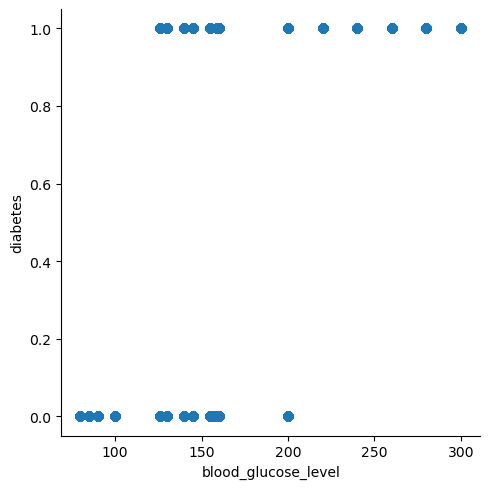

In [23]:
sns.lmplot(data = df,x='blood_glucose_level',y='diabetes',fit_reg=False);

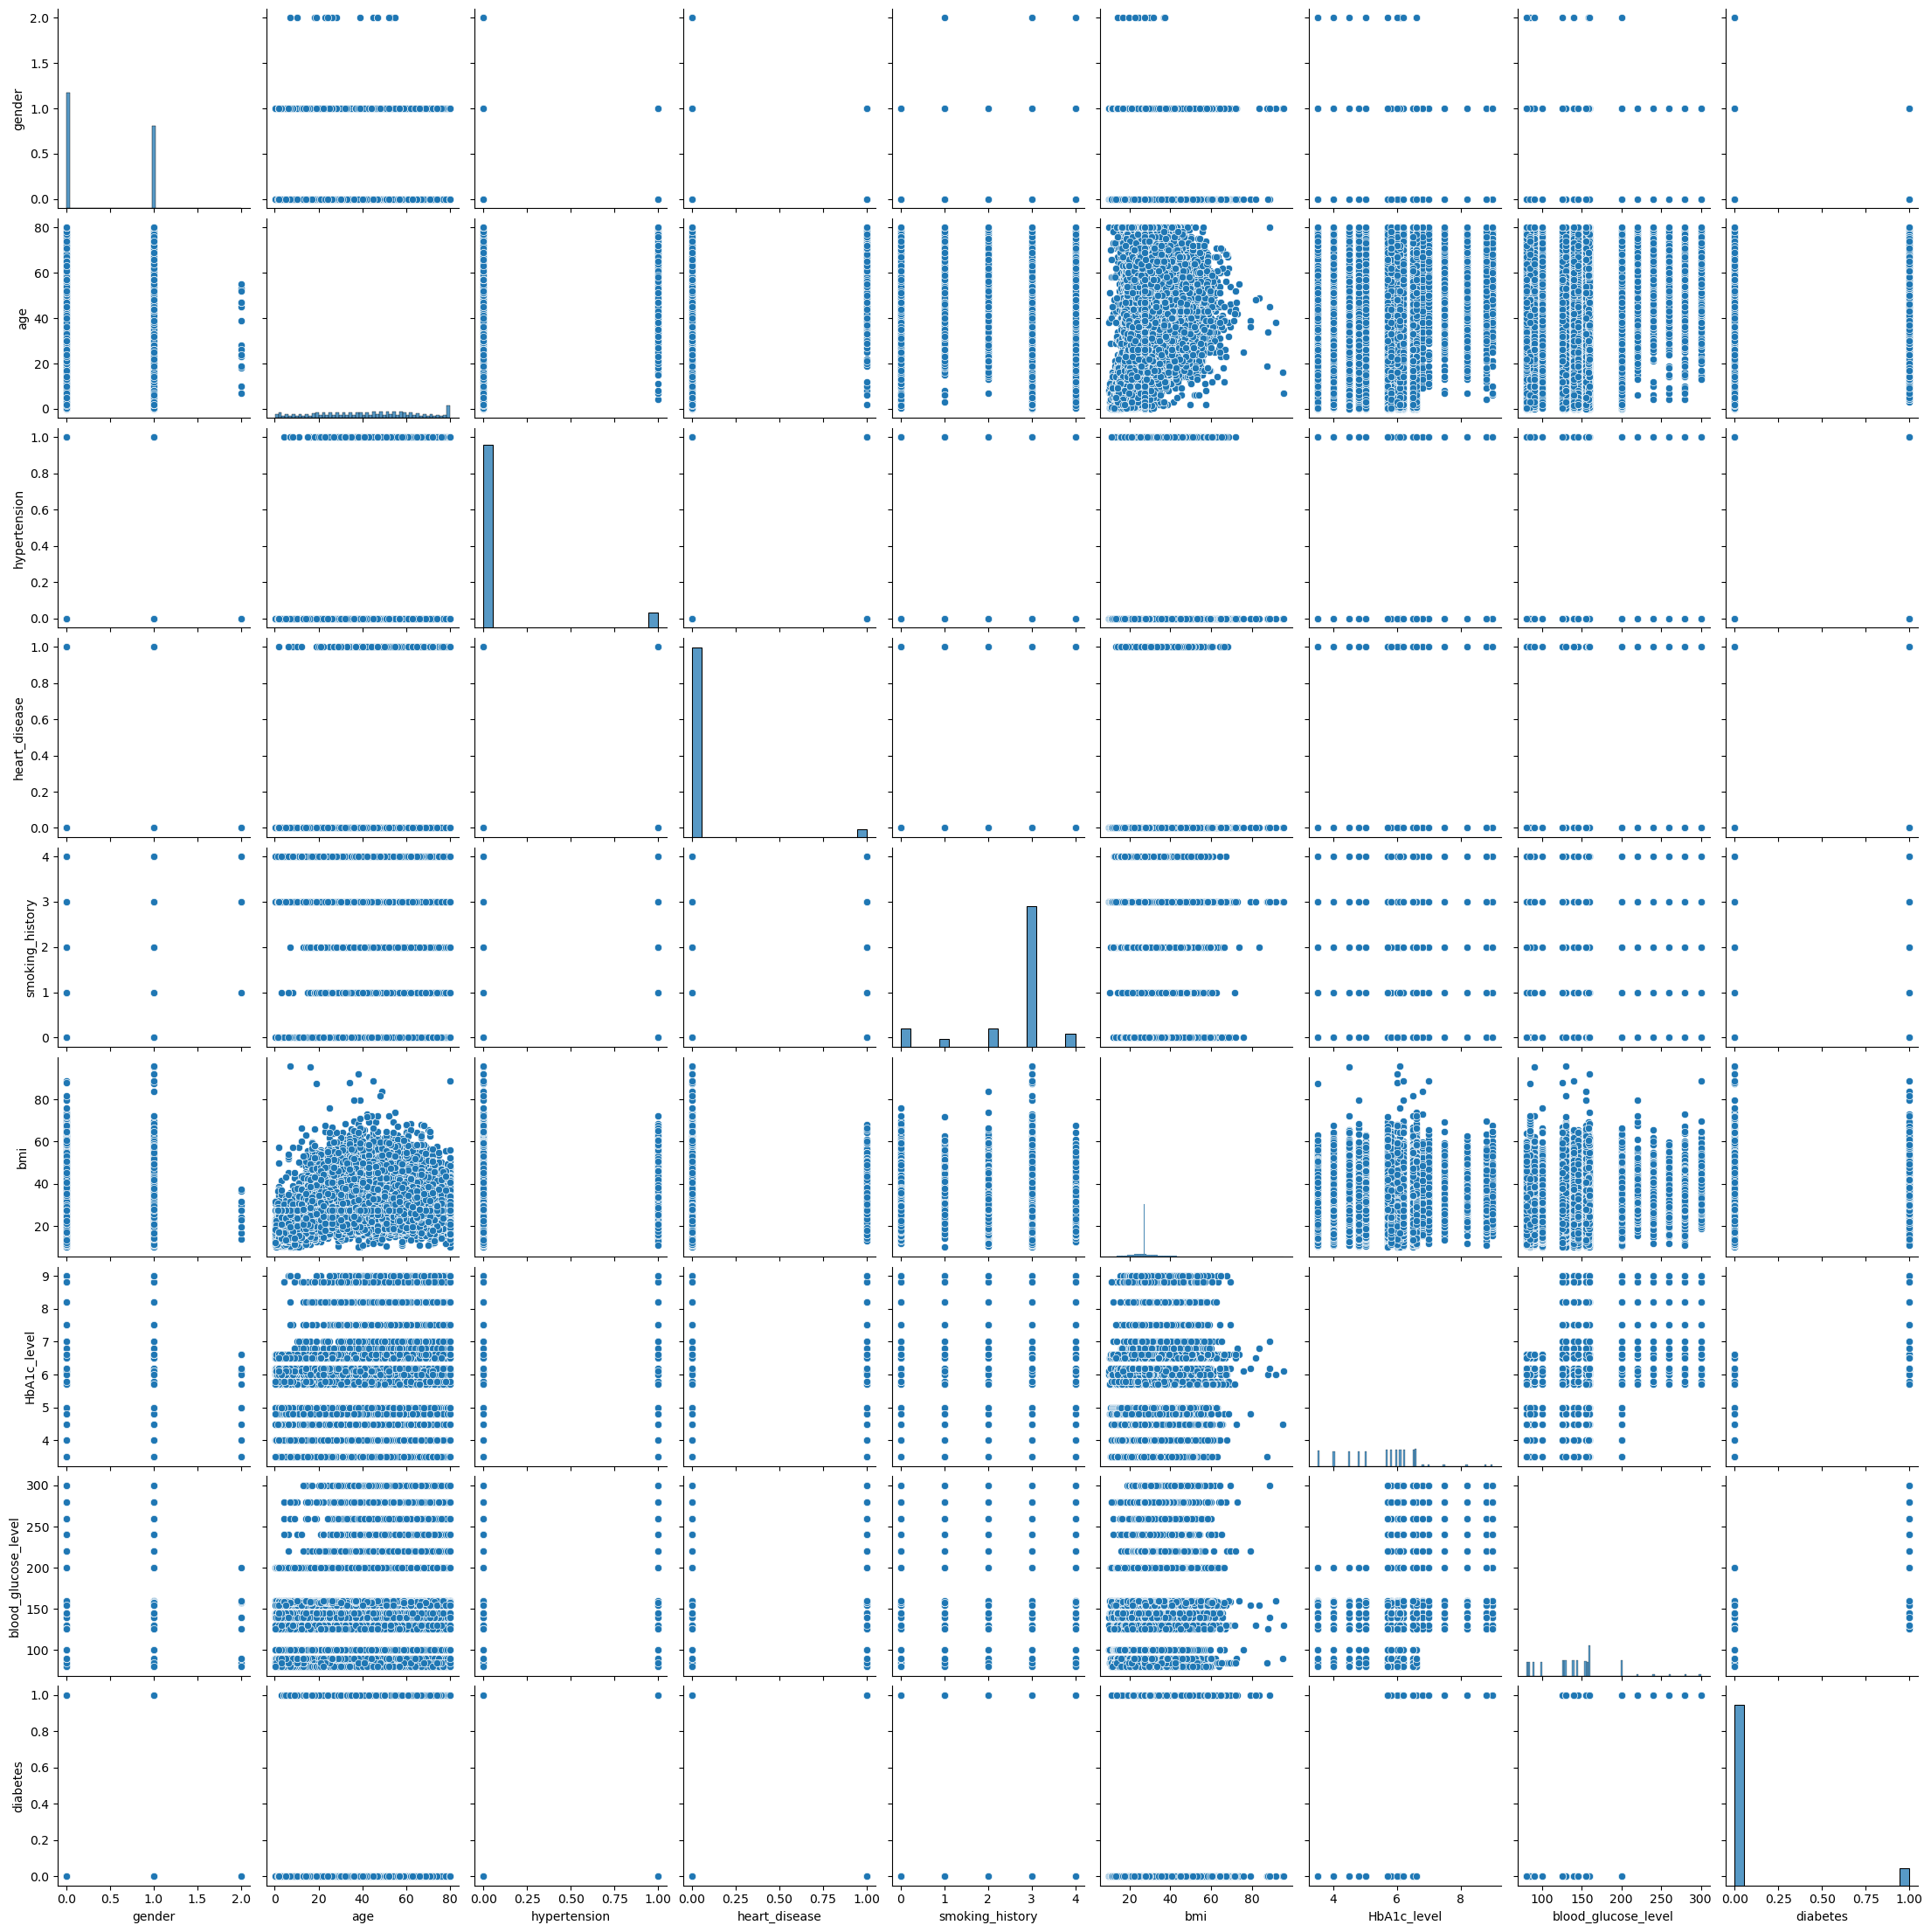

In [24]:
sns.pairplot(df);

In [25]:
df.corr()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
gender,1.000000,-0.030656,0.014203,0.077696,-0.044081,-0.022994,0.019957,0.017199,0.037411
age,-0.030656,1.000000,0.251171,0.233354,-0.098969,0.337396,0.101354,0.110672,0.258008
hypertension,0.014203,0.251171,1.000000,0.121262,-0.048631,0.147666,0.080939,0.084429,0.197823
heart_disease,0.077696,0.233354,0.121262,1.000000,-0.048253,0.061198,0.067589,0.070066,0.171727
smoking_history,-0.044081,-0.098969,-0.048631,-0.048253,1.000000,-0.087735,-0.017534,-0.022985,-0.049841
bmi,-0.022994,0.337396,0.147666,0.061198,-0.087735,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.019957,0.101354,0.080939,0.067589,-0.017534,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.017199,0.110672,0.084429,0.070066,-0.022985,0.091261,0.166733,1.000000,0.419558
diabetes,0.037411,0.258008,0.197823,0.171727,-0.049841,0.214357,0.400660,0.419558,1.000000


<Axes: >

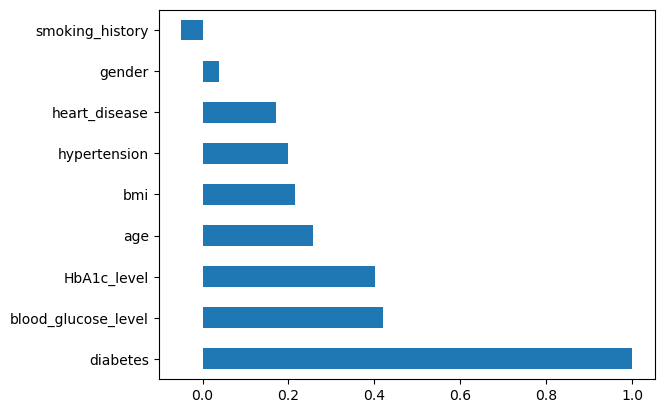

In [26]:
df.corr()['diabetes'].sort_values(ascending=False).plot(kind='barh')

In [27]:
x = df.loc[:,'age':'heart_disease'].join(df.loc[:,'bmi':'blood_glucose_level'])

In [28]:
x

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,1,25.19,6.6,140
1,54.0,0,0,27.32,6.6,80
2,28.0,0,0,27.32,5.7,158
3,36.0,0,0,23.45,5.0,155
4,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,0,27.32,6.2,90
99996,2.0,0,0,17.37,6.5,100
99997,66.0,0,0,27.83,5.7,155
99998,24.0,0,0,35.42,4.0,100


In [29]:
y = df.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [31]:
ss = StandardScaler()
ss

StandardScaler()

In [32]:
x_train = ss.fit_transform(x_train)

In [33]:
x_test = ss.fit_transform(x_test)

In [34]:
lr = LogisticRegression()
lr

LogisticRegression()

In [35]:
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred = lr.predict(x_test)

In [37]:
accuracy_score(y_test,y_pred)*100

95.975

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18297
           1       0.86      0.63      0.73      1703

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.85     20000
weighted avg       0.96      0.96      0.96     20000



In [39]:
bias = lr.score(x_train,y_train)*100
bias

96.02374999999999

In [40]:
cm = confusion_matrix(y_test,y_pred)


In [41]:
cm

array([[18114,   183],
       [  622,  1081]], dtype=int64)

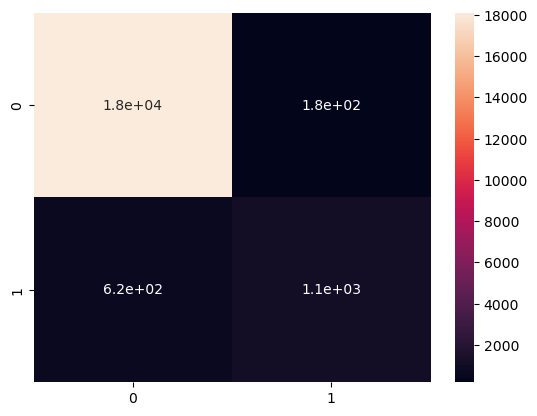

In [42]:
sns.heatmap(cm,annot=True);

In [43]:
value_count = y_train.value_counts()
value_count

diabetes
0    73203
1     6797
Name: count, dtype: int64

The data is highly imballance


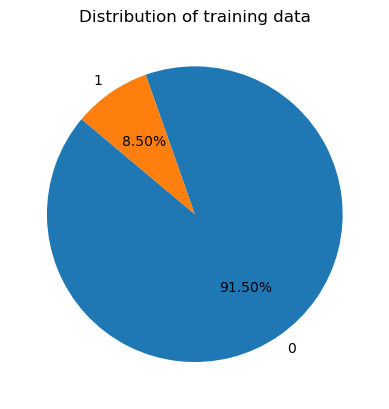

In [45]:
plt.pie(value_count,labels=value_count.index,autopct='%1.2f%%',startangle=140)
plt.title("Distribution of training data")
plt.show()

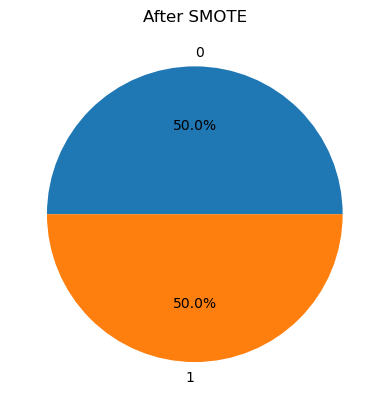

In [46]:
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)
plt.pie(y_smote.value_counts(),labels=y_smote.value_counts().index,autopct='%1.1f%%')
plt.title("After SMOTE")
plt.show()

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,random_state=0,test_size=0.20)

In [48]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(146400, 6)
(146400,)
(36600, 6)
(36600,)


In [49]:
print(y_train.value_counts())
print(y_test.value_counts())

diabetes
0    73308
1    73092
Name: count, dtype: int64
diabetes
1    18408
0    18192
Name: count, dtype: int64


In [50]:
x_train = pd.DataFrame(ss.fit_transform(x_train))
x_test = pd.DataFrame(ss.fit_transform(x_test))

In [51]:
x_train.head()

,0,1,2,3,4,5
0,-0.258300,-0.293651,-0.204831,-0.288392,-0.035329,-0.659714
1,0.067502,-0.293651,-0.204831,-0.985817,-0.035329,-0.659714
2,-1.468421,-0.293651,-0.204831,2.237381,0.372410,0.636051
3,0.927344,-0.293651,-0.204831,1.092695,0.226214,2.036877
4,1.136466,-0.293651,-0.204831,1.922518,1.068866,-0.414569


In [52]:
x_test.head()

,0,1,2,3,4,5
0,-0.956933,-0.295759,-0.199357,-0.287737,-0.930440,-0.657884
1,-0.771569,-0.295759,-0.199357,-0.287737,-2.150021,-0.413324
2,-2.115459,-0.295759,-0.199357,-1.128408,0.370448,-0.063953
3,0.010739,-0.295759,-0.199357,-0.879839,0.457125,0.984159
4,0.433298,-0.295759,-0.199357,1.500227,-0.036080,-0.657884


In [53]:
lr.fit(x_train,y_train)

LogisticRegression()

In [54]:
y_pred = lr.predict(x_test)
y_pred[:10]

array([0, 0, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)

In [55]:
y_test[:10]

53326     0
32582     0
42963     0
130043    1
93597     0
107421    1
64577     0
15270     0
55481     0
79433     0
Name: diabetes, dtype: int64

In [56]:
accuracy_score(y_test,y_pred)*100

88.83879781420765

<Axes: >

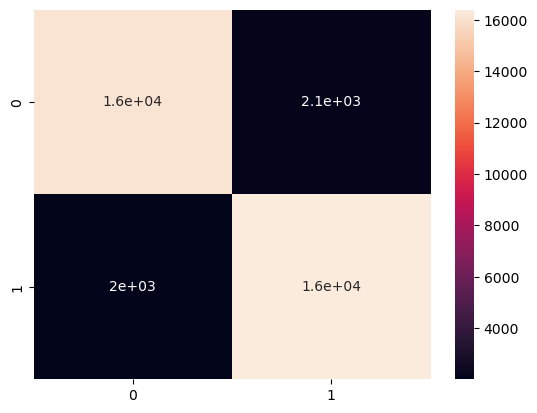

In [57]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [58]:
cm

array([[16115,  2077],
       [ 2008, 16400]], dtype=int64)

In [59]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89     18192
           1       0.89      0.89      0.89     18408

    accuracy                           0.89     36600
   macro avg       0.89      0.89      0.89     36600
weighted avg       0.89      0.89      0.89     36600



In [60]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
y_pred_dt = dt.predict(x_test)

In [62]:
accuracy_score(y_test,y_pred_dt)*100

87.03005464480874

In [63]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.75      0.85     18192
           1       0.80      0.99      0.88     18408

    accuracy                           0.87     36600
   macro avg       0.89      0.87      0.87     36600
weighted avg       0.89      0.87      0.87     36600



In [64]:
cm = confusion_matrix(y_test,y_pred_dt)
cm

array([[13592,  4600],
       [  147, 18261]], dtype=int64)

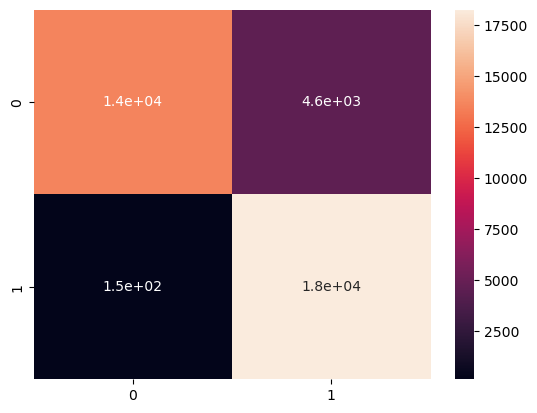

In [65]:
sns.heatmap(cm,annot=True);

In [66]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
y_pred_rf = rf.predict(x_test)

In [68]:
accuracy_score(y_test,y_pred_rf)*100

93.46174863387978

In [69]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93     18192
           1       0.89      0.99      0.94     18408

    accuracy                           0.93     36600
   macro avg       0.94      0.93      0.93     36600
weighted avg       0.94      0.93      0.93     36600



In [70]:
cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[15975,  2217],
       [  176, 18232]], dtype=int64)

<Axes: >

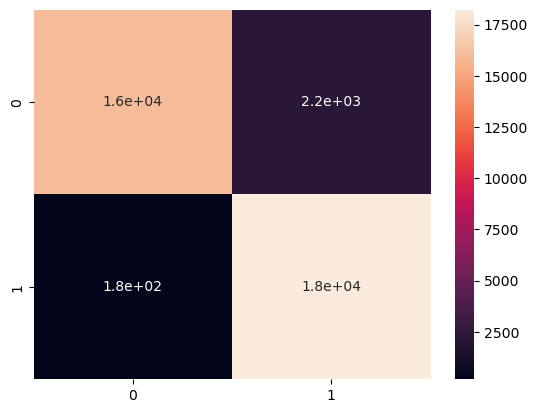

In [71]:
sns.heatmap(cm,annot=True)

In [72]:
xb = XGBClassifier()
xb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
y_pred_xb = xb.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred_xb)*100

82.6311475409836

In [75]:
print(classification_report(y_test,y_pred_xb))

              precision    recall  f1-score   support

           0       0.99      0.66      0.79     18192
           1       0.75      0.99      0.85     18408

    accuracy                           0.83     36600
   macro avg       0.87      0.83      0.82     36600
weighted avg       0.87      0.83      0.82     36600



In [76]:
cm = confusion_matrix(y_test,y_pred_xb)
cm

array([[12013,  6179],
       [  178, 18230]], dtype=int64)

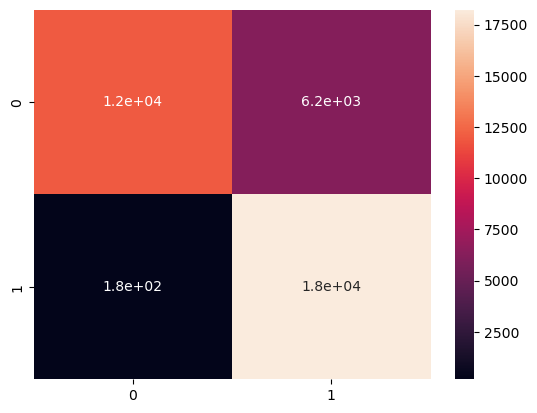

In [77]:
sns.heatmap(cm,annot=True);

## Finding the best param grid in hyperparameter tuning

In [79]:
lr = LogisticRegression()
param_grid = {"penalty" : ['l1', 'l2', 'elasticnet'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(estimator=lr,param_grid=param_grid,cv=10)

In [80]:
for _ in range(10):
    grid_search.fit(x_train,y_train)

In [81]:
grid_search.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [82]:
for i in range(10):
    cv_score = cross_val_score(grid_search.best_estimator_,x_train,y_train,cv = 10)

In [83]:
cv_score

array([0.88852459, 0.8898224 , 0.88094262, 0.8852459 , 0.88469945,
       0.88510929, 0.88592896, 0.88627049, 0.88367486, 0.88312842])

In [84]:
grid_search.best_score_

0.8853346994535519

In [85]:
final_lr = LogisticRegression(C = 0.001, penalty= 'l2')
final_lr.fit(x_train,y_train)

LogisticRegression(C=0.001)

In [86]:
final_lr.score(x_test,y_test)*100

88.90437158469945

In [87]:
y_pred_final_lr = final_lr.predict(x_test)
accuracy_score(y_test,y_pred_final_lr)*100

88.90437158469945

In [88]:
cm = confusion_matrix(y_test,y_pred_final_lr)
cm

array([[16098,  2094],
       [ 1967, 16441]], dtype=int64)

In [89]:
import pickle
with open('final_lr.pkl','wb') as file:
    pickle.dump(final_lr,file)

In [90]:
print(df['age'].mean())
print(df['hypertension'].mean())
print(df['heart_disease'].mean())
print(df['bmi'].mean())
print(df['HbA1c_level'].mean())
print(df['blood_glucose_level'].mean())

41.885856
0.07485
0.03942
27.3207671
5.527507
138.05806


In [91]:
print(df['age'].std())
print(df['hypertension'].std())
print(df['heart_disease'].std())
print(df['bmi'].std())
print(df['HbA1c_level'].std())
print(df['blood_glucose_level'].std())

22.51683987161513
0.2631504702291422
0.19459301699790674
6.636783416649581
1.0706720918832282
40.70813604870113


In [92]:
# Load the model from the pickle file
with open('final_lr.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Define the mean and standard deviation of the training data
mean_values = [41.885856, 0.07485, 0.03942, 27.320767, 5.527507, 138.058060]
std_values = [22.516840, 0.26315, 0.194593, 6.636783, 1.070672, 40.708136]

# Define the input features for prediction
age = 30
hypertension = 0
heart_disease = 0
bmi = 100.0
HbA1c_level = 5.0
blood_glucose_level = 90

# Scale the input features manually
input_features = [age, hypertension, heart_disease, bmi, HbA1c_level, blood_glucose_level]

# Initialize an empty list to store the scaled features
scaled_features = []

# Loop through each feature, its corresponding mean, and standard deviation
for x, mean, std in zip(input_features, mean_values, std_values):
    # Scale the feature and append it to the scaled_features list
    scaled_value = (x - mean) / std
    scaled_features.append(scaled_value)

# Now, scaled_features contains the normalized values


# Make predictions on the scaled data
prediction = loaded_model.predict([scaled_features])

# Print the prediction
if prediction[0] == 1:
    print("Diabetic")
else:
    print("Not Diabetic")


Diabetic


In [190]:
scaled_features

[-0.5278651888986198,
 -0.2844385331559947,
 -0.20257666000318614,
 10.950973235074883,
 -0.49268776992393554,
 -1.1805517206683207]